# 1. Introduction
Stocks rise and fall, creating patterns and movements are unpredictable. Yet, much like how scientists predict the movement of the waves by understanding the currents below, we too can decipher some of the patterns of the stock market with similar tools.

By entering into the Wavelet Transform, we look beneath the surface, seeking to uncover the deep currents that drive stock prices. This journey is not just about numbers and data; it’s about translating the abstract into the tangible, taking the seemingly erratic behavior of stocks and finding rhythm and reason.

In [6]:
import pandas as pd

# File path and sheet name
file_path = "D:\Research Papers\Economics\For Cross Country Stock Analysis\Merged\stock market data.xlsx"
sheet_name = "ULBSL"

# Use pandas to read the specific sheet
data = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=1)  # Skip the first two rows (headers)

# Select the desired columns
data = data[["Date", "LTP"]]

# Print the data (optional)
print(data)

          Date     LTP
0   2022-05-27  1259.9
1   2022-05-30  1363.6
2   2022-05-31  1475.8
3   2022-06-01  1535.4
4   2022-06-02  1597.4
..         ...     ...
513 2024-07-29  2810.0
514 2024-07-30  3000.0
515 2024-07-31  2850.0
516 2024-08-01  2700.1
517 2024-08-05  2755.0

[518 rows x 2 columns]


In [15]:
import numpy as np
from scipy import signal

df = pd.read_excel(file_path, sheet_name=sheet_name, usecols=["LTP"], skiprows=1)

# Handle missing values (replace with mean)
close_data = df['LTP'].fillna(df['LTP'].mean()).values

# Define wavelet parameters
widths = np.arange(1, 7)

# Compute CWT
cwt_result = signal.cwt(close_data, signal.ricker, widths)

print(cwt_result)


[[  -85.79145645   644.14955054   287.72887377 ...   238.83065397
    535.55072911  1466.33810446]
 [ -228.72440308   472.14254227   745.3733004  ...  2002.49447411
   2210.08594402  1479.10473462]
 [ -500.78765943    41.63567459   421.20810046 ...  3080.58079559
   2624.23450025  1527.00824752]
 [ -887.06233642  -415.60564391    22.38436536 ...  3430.57455187
   2735.55053774  1637.7968872 ]
 [-1221.38161582  -736.93503978  -226.33539332 ...  3535.22459648
   2777.39651635  1751.0621657 ]
 [-1429.23669386  -907.90715142  -342.36174223 ...  3545.28876624
   2793.04503322  1849.79487077]]


# Buy and Sell Signal Recognition

In [17]:
# Calculate positive and negative components
cwt_positive = np.where(cwt_result > 0, cwt_result, 0)
cwt_negative = np.where(cwt_result < 0, cwt_result, 0)

# Generate buy and sell signals
buy_signal = pd.Series(np.sum(cwt_positive, axis=0), index=df.index)
sell_signal = pd.Series(-np.sum(cwt_negative, axis=0), index=df.index)

print(buy_signal)
print(sell_signal)

0          0.000000
1       1157.927767
2       1476.694640
3       2013.816888
4       2795.820017
           ...     
513    14899.670716
514    16084.480037
515    15832.993838
516    13675.863261
517     9711.105010
Length: 518, dtype: float64
0      4352.984165
1      2060.447835
2       568.697136
3        -0.000000
4        72.813373
          ...     
513      -0.000000
514      -0.000000
515      -0.000000
516      -0.000000
517      -0.000000
Length: 518, dtype: float64


# Identifying Signal Crossovers and Trading Oppurtunities

In [18]:
cross_above = (buy_signal >= sell_signal) & (buy_signal.shift(1) < sell_signal.shift(1))
cross_below = (buy_signal <= sell_signal) & (buy_signal.shift(1) > sell_signal.shift(1))

# Visual Representation of Buy and Sell

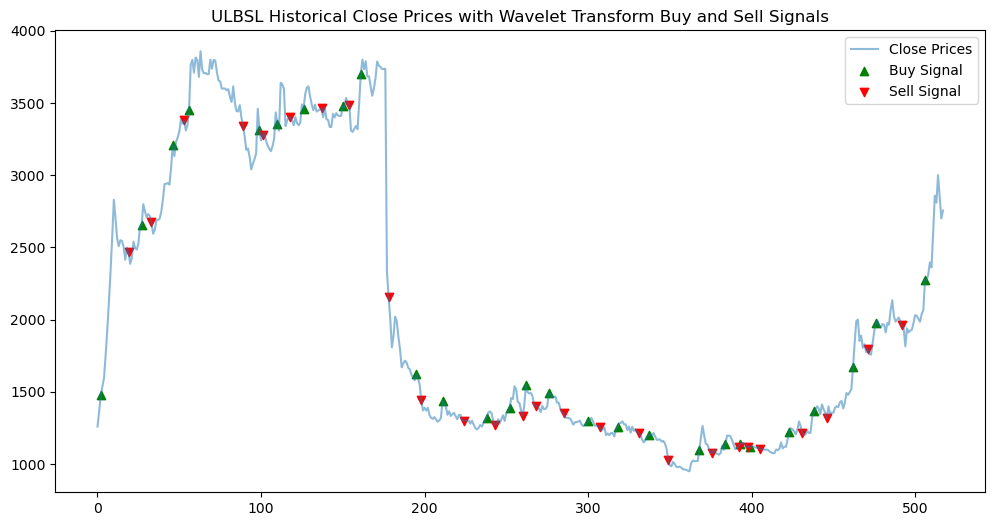

In [19]:
import matplotlib.pyplot as plt
ticker = "ULBSL"
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['LTP'], label='Close Prices', alpha=0.5)
plt.scatter(df.index[cross_above], df['LTP'][cross_above], label='Buy Signal', marker='^', color='g')
plt.scatter(df.index[cross_below], df['LTP'][cross_below], label='Sell Signal', marker='v', color='r')
plt.title(f'{ticker} Historical Close Prices with Wavelet Transform Buy and Sell Signals')
plt.legend()
plt.show()